#  Assignment 2: Differential Kinematics and Jacobian Analysis

This notebook is part of the **Fundamentals of Robotics** course and contains:
- 📊 Derivation and implementation of the Jacobian matrix
- ⚙️ Singularities analysis (elbow and wrist)
- 🚀 Forward & inverse velocity kinematics
- ⏱️ Numerical integration of joint and Cartesian velocities
- 🔁 Singularity resolution strategies

> **Note:** Where possible, code from Assignment 1 is reused. Plotting and animation tools are included, while 3D tools incompatible with some environments are commented out.


$$
  \text{Fundamentals of Robotics — Assignment 2} \\
  \text{Valeria Neganova — RO-1} \\
  \text{2025}
$$

---



### Spherical Manipulator zxz
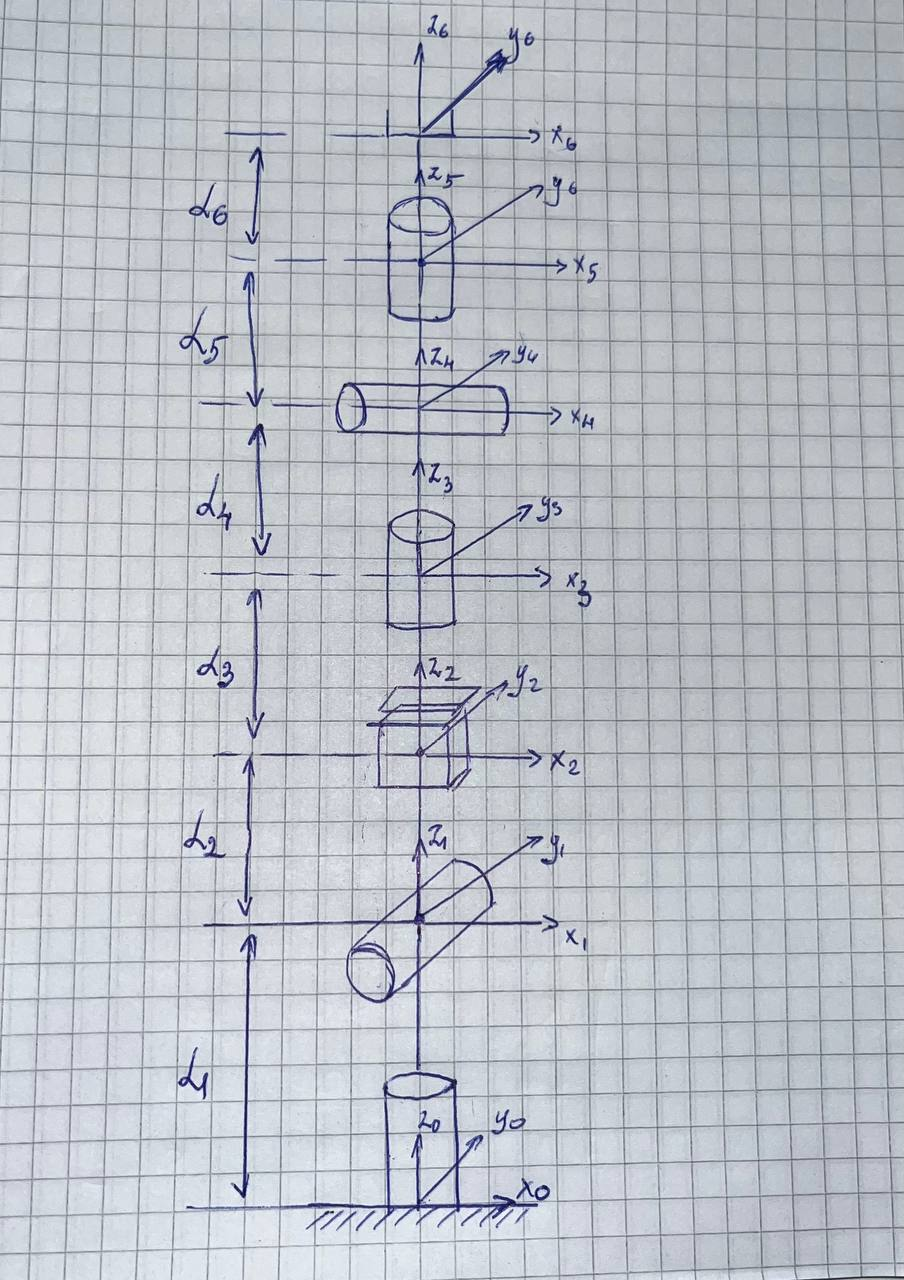


#### Arm


$$
^0T_1 = T({\theta_1}, L_1) =
\begin{bmatrix}
\cos\theta_1 & -\sin\theta_1 & 0 & 0 \\
\sin\theta_1 & \cos\theta_1 & 0 & 0 \\
0 & 0 & 1 & L_1 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$



$$
^1T_2 = T({\theta_2}, L_2)=
 \begin{bmatrix}
\cos(\theta_2) & 0 & -\sin(\theta_2) & -L_2\sin(\theta_2) \\
0 & 1 & 0 & 0 \\
\sin(\theta_2) & 0 & \cos(\theta_2) & L_2\cos(\theta_2) \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

$$
^2T_3 = T(d_3, L_3)
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & d_3 + L_3 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

#### Spherical wrist



$$
^3T_4 = T({\theta_4}, L_4) =
\begin{bmatrix}
\cos\theta_4 & -\sin\theta_4 & 0 & 0 \\
\sin\theta_4 & \cos\theta_4 & 0 & 0 \\
0 & 0 & 1 & L_4 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$


$$
^4T_5 = T({\theta_5}, L_5) =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & \cos(\theta_5) & -\sin(\theta_5) & -L_5\sin(\theta_5) \\
0 & \sin(\theta_5) & \cos(\theta_5) & L_5\cos(\theta_5) \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

$$
^5T_6 = T({\theta_6}, L_6)
\begin{bmatrix}
\cos\theta_6 & -\sin\theta_6 & 0 & 0 \\
\sin\theta_6 & \cos\theta_6 & 0 & 0 \\
0 & 0 & 1 & L_6 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$


As I compute in the previous assigment forward kinematics :

$${}^0_6T =
\begin{bmatrix}
-c_6(c_1 s_2 s_5 - c_5(c_1 c_2 c_4 - s_1 s_4)) - s_6(c_1 c_2 s_4 + c_4 s_1) &
-c_6(c_1 c_2 s_4 + c_4 s_1) + s_6(c_1 s_2 s_5 - c_5(c_1 c_2 c_4 - s_1 s_4)) &
c_1 c_5 s_2 + s_5(c_1 c_2 c_4 - s_1 s_4) &
10 c_1 c_5 s_2 (d_3 + 5) + 10 c_1 s_2 + 10 s_5(c_1 c_2 c_4 - s_1 s_4) \\
-c_6(c_1 s_4 + c_2 c_4 s_1) - s_1 s_2 s_5 + s_6(c_1 c_4 - c_2 s_1 s_4) &
s_6(c_1 s_4 + c_2 c_4 s_1) - c_5 s_1 s_2 - c_6(c_1 c_4 - c_2 s_1 s_4) &
c_5 s_1 s_2 + s_5(c_1 s_4 + c_2 c_4 s_1) &
10 s_1 s_2 + 10 s_5(c_1 s_4 + c_2 c_4 s_1) \\
-c_6(c_2 s_5 + c_4 c_5 s_2) + s_2 s_4 s_6 &
c_6 s_2 s_4 + s_6(c_2 s_5 + c_4 c_5 s_2) &
c_2 c_5 - c_4 s_2 s_5 &
c_2 c_5 + c_2 d_3 + 15 c_2 - 10 c_4 s_2 s_5 + 5 \\
0 & 0 & 0 & 1
\end{bmatrix}$$

In [1]:
import sympy as sym

def Rx_sym(q):
    T = sym.Matrix([[1,         0,          0, 0],
                  [0, sym.cos(q), -sym.sin(q), 0],
                  [0, sym.sin(q),  sym.cos(q), 0],
                  [0,         0,          0, 1]])
    return T

def Ry_sym(q):
    T = sym.Matrix([[ sym.cos(q), 0, -sym.sin(q), 0],
                  [         0, 1,         0, 0],
                  [sym.sin(q), 0, sym.cos(q), 0],
                  [         0, 0,         0, 1]])
    return T

def Rz_sym(q):
    T = sym.Matrix([[sym.cos(q), -sym.sin(q), 0, 0],
                  [sym.sin(q),  sym.cos(q), 0, 0],
                  [        0,          0, 1, 0],
                  [        0,          0, 0, 1]])
    return T

def Tx_sym(x):
    T = sym.Matrix([[1, 0, 0, x],
                  [0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    return T

def Ty_sym(y):
    T = sym.Matrix([[1, 0, 0, 0],
                  [0, 1, 0, y],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    return T

def Tz_sym(z):
    T = sym.Matrix([[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, z],
                  [0, 0, 0, 1]])
    return T


def dRz_sym(q):
            return sp.Matrix([
                [-sp.sin(q), -sp.cos(q), 0, 0],
                [ sp.cos(q), -sp.sin(q), 0, 0],
                [0, 0, 0, 0],
                [0, 0, 0, 0]
            ])
def dRy_sym(q):
  return sp.Matrix([
    [-sp.sin(q), 0,  sp.cos(q), 0],
    [0, 0, 0, 0],
    [-sp.cos(q), 0, -sp.sin(q), 0],
    [0, 0, 0, 0]
 ])

def dRx_sym(q):
  return sp.Matrix([
    [0, 0, 0, 0],
    [0, -sp.sin(q), -sp.cos(q), 0],
    [0,  sp.cos(q), -sp.sin(q), 0],
    [0, 0, 0, 0]
  ])



def A_sym(theta, d, a, alpha):
  return Rz_sym(theta) @ Tz_sym(d) @ Tx_sym(a) @ Rx_sym(alpha)

In [2]:
from sympy import simplify


q1, q2, q3, q4, q5, q6 = sym.symbols('q_1, q_2, q_3, q_4, q_5, q_6')
d3 = sym.symbols('d_3')
L1, L2, L3, L4, L5, L6 = sym.symbols('L_1, L_2, L_3, L_4, L_5, L_6')
# d1, d2, d3 = 1, 1, 1

T1 = Rz_sym(q1) @ Tz_sym(L1)
T2 = Ry_sym(q2) @ Tz_sym(L2)
T3 = Tz_sym(d3 + L3)
T4 = Rz_sym(q4) @ Tz_sym(L4)
T5 = Rx_sym(q5) @ Tz_sym(L5)
T6 = Rz_sym(q6) @ Tz_sym(L6)

T06 = simplify(T1 @ T2 @ T3 @ T4 @ T5 @ T6)

display(T06)

print()


Matrix([
[-((sin(q_1)*cos(q_4) + sin(q_4)*cos(q_1)*cos(q_2))*cos(q_5) + sin(q_2)*sin(q_5)*cos(q_1))*sin(q_6) - (sin(q_1)*sin(q_4) - cos(q_1)*cos(q_2)*cos(q_4))*cos(q_6), -((sin(q_1)*cos(q_4) + sin(q_4)*cos(q_1)*cos(q_2))*cos(q_5) + sin(q_2)*sin(q_5)*cos(q_1))*cos(q_6) + (sin(q_1)*sin(q_4) - cos(q_1)*cos(q_2)*cos(q_4))*sin(q_6), (sin(q_1)*cos(q_4) + sin(q_4)*cos(q_1)*cos(q_2))*sin(q_5) - sin(q_2)*cos(q_1)*cos(q_5), -L_2*sin(q_2)*cos(q_1) - L_4*sin(q_2)*cos(q_1) + L_5*(sin(q_1)*cos(q_4) + sin(q_4)*cos(q_1)*cos(q_2))*sin(q_5) - L_5*sin(q_2)*cos(q_1)*cos(q_5) + L_6*((sin(q_1)*cos(q_4) + sin(q_4)*cos(q_1)*cos(q_2))*sin(q_5) - sin(q_2)*cos(q_1)*cos(q_5)) - (L_3 + d_3)*sin(q_2)*cos(q_1)],
[-((sin(q_1)*sin(q_4)*cos(q_2) - cos(q_1)*cos(q_4))*cos(q_5) + sin(q_1)*sin(q_2)*sin(q_5))*sin(q_6) + (sin(q_1)*cos(q_2)*cos(q_4) + sin(q_4)*cos(q_1))*cos(q_6), -((sin(q_1)*sin(q_4)*cos(q_2) - cos(q_1)*cos(q_4))*cos(q_5) + sin(q_1)*sin(q_2)*sin(q_5))*cos(q_6) - (sin(q_1)*cos(q_2)*cos(q_4) + sin(q_4)*cos(q_1)

### Jacobian matrix

Let’s define each column of the Jacobian step by step. Each column represents how the i-th joint affects the end-effector’s position.



The method for computing the Jacobian depends on the type of joint—revolute or prismatic

**For a revolute joint**:

$$
\vec{J}_{v_i} = \vec{z}_{i-1} \times (\vec{o}_n - \vec{o}_{i-1}), \quad \vec{J}_{\omega_i} = \vec{z}_{i-1}
$$

**Explanation**:
- $(\vec{J}_{v_i})$ is the linear velocity component of the Jacobian column for the *i*-th joint.
- $(\vec{J}_{\omega_i}$) is the angular velocity component.
- $(\vec{z}_{i-1}$) is the axis of rotation of the *i*-th joint (in base frame coordinates).
- $(\vec{o}_n)$ is the position vector of the end-effector.
- $(\vec{o}_{i-1}$) is the origin of the *i*-th joint frame.


**For a prismatic joint**:

$$
\vec{J}_{v_i} = \vec{z}_{i-1}, \quad \vec{J}_{\omega_i} = \vec{0}
$$

**Explanation**:
- $(\vec{J}_{v_i})$ is the linear velocity component of the Jacobian column for the *i*-th joint.
- $(\vec{J}_{\omega_i})$ is the angular velocity component, which is zero because a prismatic joint does not produce rotation.
- $(\vec{z}_{i-1})$ is the direction of motion for the prismatic joint (in base frame coordinates).

In this case, the joint only contributes to the translational movement of the end-effector.

**Vectors computation**

   $\vec{z}_{i-1}$ is given by the third column of the rotation matrix $R_{i-1}^0$, i.e.,
  
  $$
  \vec{z}_{i-1} = R_1^0(q_1) \cdots R_{i-1}^{i-2}(q_{i-1}) \vec{z}_0 \tag{3.31}
  $$
  
  where $\vec{z}_0 = \begin{bmatrix} 0 & 0 & 1 \end{bmatrix}^T$ allows the selection of the third column.
  
   $\vec{p}_e$ is given by the first three elements of the fourth column of the transformation matrix $T_e^0$, i.e., by expressing $\tilde{p}_e$ in the $(4 \times 1)$ homogeneous form

  $$
  \tilde{p}_e = A_1^0(q_1) \cdots A_n^{n-1}(q_n) \tilde{p}_0 \tag{3.32}
  $$
  
  where $\tilde{p}_0 = \begin{bmatrix} 0 & 0 & 0 & 1 \end{bmatrix}^T$ allows the selection of the fourth column.


---



From the full transformation matrix ${}^0T_6 $, the **position of the end-effector** is given by the last column vector. I already calculated it(code above). $( \vec{o}_6 $) is too complex, let's calculate jacobian in general and denote :

$$
\vec{o}_6 =
\begin{bmatrix}
x_e \\
y_e \\
z_e
\end{bmatrix}
$$

### First column - first joint

**First joint** - rotational movement

#### Transformation Matrix from Frame 0 to Frame 1:

$$
{}^0T_1 =
\begin{bmatrix}
\cos \theta_1 & -\sin \theta_1 & 0 & 0 \\
\sin \theta_1 & \cos \theta_1 & 0 & 0 \\
0 & 0 & 1 & L_1 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$




Also given:

#### Base Frame Origin and Axis:

$$
\vec{o}_0 =
\begin{bmatrix}
0 \\
0 \\
0
\end{bmatrix}, \quad
\vec{z}_0 =
\begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix}
$$

**Explanation**:

 $ {}^0T_1 $ is the homogeneous transformation matrix from frame 0 to frame 1

 $ \vec{o}_6 $ represents the position of the end-effector in the base frame

 $ \vec{o}_0 $ is the origin of the base frame

 $ \vec{z}_0 $ is the z-axis unit vector of the base frame, typically used when computing Jacobian columns.

### Step-by-step computation of the first Jacobian column $J_1$

#### Cross product:

$$
\vec{z}_0 \times \vec{o}_6 =
\begin{bmatrix}
0 \cdot z_e - 1 \cdot y_e \\
1 \cdot x_e - 0 \cdot z_e \\
0 \cdot y_e - 0 \cdot x_e
\end{bmatrix}
=
\begin{bmatrix}
- y_e \\
x_e \\
0
\end{bmatrix}
$$

#### Using $\vec{o}_0 = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}$, $\vec{z}_0 = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$:

$$
\vec{J}_{v1} = \vec{z}_0 \times (\vec{o}_6 - \vec{o}_0) =
\begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix}
\times
\begin{bmatrix}
x_e \\
y_e \\
z_e
\end{bmatrix}
=
\begin{bmatrix}
- y_e \\
x_e \\
0
\end{bmatrix}
$$

$$
\vec{J}_{\omega1} = \vec{z}_0 =
\begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix}
$$


### Therefore, the first column of the Jacobian $J_1$ is:

$$
J_1 =
\begin{bmatrix}
- y_e \\
x_e \\
0 \\
0 \\
0 \\
1
\end{bmatrix}
$$



---
### Second column - Second joint

**Second joint** - rotational movement



#### Step 1: Find $\vec{z}_1$


$$
\vec{z}_1 = R_1^0(q_1) \cdot \vec{z}_0 =
\begin{bmatrix}
c_1 & -s_1 & 0\\
s_1 & c_1 & 0 \\
0 & 0 & 1
\end{bmatrix} \cdot
\begin{bmatrix}
0 \\
1 \\
0
\end{bmatrix}  =
\begin{bmatrix}
- s_1 \\
c_1 \\
0
\end{bmatrix}
$$

#### Step 2: Find $\vec{o}_1$



$$
\vec{o}_1 = {}^0T_1 \cdot p_0 = ^0T_1 = T({\theta_1}, L_1) =
\begin{bmatrix}
\cos\theta_1 & -\sin\theta_1 & 0 & 0 \\
\sin\theta_1 & \cos\theta_1 & 0 & 0 \\
0 & 0 & 1 & L_1 \\
0 & 0 & 0 & 1
\end{bmatrix} \cdot
\begin{bmatrix}
0 \\
0 \\
0 \\
1
\end{bmatrix} = \begin{bmatrix}
0 \\
0 \\
L_1 \\
1
\end{bmatrix}
$$
Remove last row
$$ \vec{o}_1 =
\begin{bmatrix}
0 \\
0 \\
L_1
\end{bmatrix}
$$





#### Step 3: Compute the position difference in general form

$$
\vec{o}_6 - \vec{o}_1 =
\begin{bmatrix}
x_e \\
y_e \\
z_e - L_1
\end{bmatrix}
$$

#### Step 4: Compute the cross product

$$
\vec{J}_{v2} = \vec{z}_1 \times (\vec{o}_6 - \vec{o}_1) =
\begin{bmatrix}
- s_1 \\
c_1 \\
0
\end{bmatrix}
\times
\begin{bmatrix}
x_e \\
y_e \\
z_e - L_1
\end{bmatrix}
=
\begin{bmatrix}
c_1 (z_e - L_1) - 0 \cdot y_e \\
0 \cdot x_e - (-s_1)(z_e - L_1) \\
- s_1 y_e - c_1 x_e
\end{bmatrix}
=
\begin{bmatrix}
c_1 (z_e - L_1) \\
s_1 (z_e - L_1) \\
- s_1 y_e - c_1 x_e
\end{bmatrix}
$$



#### Step 6: Angular part of $\vec{J}_{\omega 2}$

$$
\vec{J}_{\omega 2} = \vec{z}_1 =
\begin{bmatrix}
- s_1 \\
c_1 \\
0
\end{bmatrix}
$$


### Full second column of the Jacobian $J_2$:

$$
J_2 =
\begin{bmatrix}
c_1 (z_e - L_1) \\
s_1 (z_e - L_1) \\
- s_1 y_e - c_1 x_e \\
- s_1 \\
c_1 \\
0
\end{bmatrix}
$$

---



### Third column

**Third joint — Prismatic**



#### Step 1: Compute $\vec{z}_2$

We calculate:

$$
\vec{z}_2 = R_0^2 \cdot \vec{z}_0 = R_0^1 \cdot R_1^2 \cdot \vec{z}_0
$$

Where:
- $\vec{z}_0 = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$



#### Rotation matrices:

From ${}^0T_1$:

$$
R_0^1 =
\begin{bmatrix}
c_1 & -s_1 & 0 \\
s_1 & c_1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

From ${}^1T_2$:

$$
R_1^2 =
\begin{bmatrix}
c_2 & 0 & -s_2 \\
0 & 1 & 0 \\
s_2 & 0 & c_2
\end{bmatrix}
$$


#### Multiply them:

$$
R_0^2 = R_0^1 \cdot R_1^2 =
\begin{bmatrix}
c_1 c_2 & -s_1 & -c_1 s_2 \\
s_1 c_2 & c_1 & -s_1 s_2 \\
s_2 & 0 & c_2
\end{bmatrix}
$$

Now multiply by $\vec{z}_0$ (3rd column of $R_0^2$):

$$
\vec{z}_2 =
\begin{bmatrix}
- c_1 s_2 \\
- s_1 s_2 \\
c_2
\end{bmatrix}
$$


#### Step 2: Linear part of Jacobian for the 3rd joint (Prismatic)

Since this joint is **prismatic**, its linear part is just $\vec{z}_2$:

$$
\vec{J}_{v3} = \vec{z}_2 =
\begin{bmatrix}
- c_1 s_2 \\
- s_1 s_2 \\
c_2
\end{bmatrix}
$$



#### Step 3: Angular part of Jacobian for the 3rd joint

For prismatic joints, the angular part is:

$$
\vec{J}_{\omega 3} =
\begin{bmatrix}
0 \\
0 \\
0
\end{bmatrix}
$$



####  Final result: Jacobian column $\vec{J}_3$

$$
\vec{J}_3 =
\begin{bmatrix}
- c_1 s_2 \\
- s_1 s_2 \\
c_2 \\
0 \\
0 \\
0
\end{bmatrix}
$$

---

### 4th Jacobian column $\vec{J}_4$

4th joint rotational movement

#### Step 1: Compute $\vec{z}_3$

We compute the rotation matrix:

*(3d joint is prismatic and has identity rotation matrix)

Where:
- $\vec{z}_0 = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$

$$
R_0^3 = R_0^1 \cdot R_1^2 =
\begin{bmatrix}
c_1 c_2 & -s_1 & -c_1 s_2 \\
s_1 c_2 & c_1 & -s_1 s_2 \\
s_2 & 0 & c_2
\end{bmatrix}
$$

We take the third column of $R_0^3$ to get:

$$
\vec{z}_3 =
\begin{bmatrix}
- c_1 s_2 \\
- s_1 s_2 \\
c_2
\end{bmatrix}
$$



#### Step 2: Compute $\vec{o}_3$

We take $\vec{o}_3$ from the 4th column of ${}^0T_3 = {}^0T_1 \cdot {}^1T_2 \cdot {}^2T_3$

We can calculate difference in general case(without substution real values, cause it will be so complex)

Let
$$
\vec{o}_3 =
\begin{bmatrix}
x_3 \\
y_3 \\
z_3
\end{bmatrix}
$$


$$
\vec{o}_6 - \vec{o}_3 =
\begin{bmatrix}
x_e - x_3 \\
y_e - y_3 \\
z_e - z_3
\end{bmatrix}
$$



#### Step 3: Compute the cross product

$$
\vec{J}_{v4} = \vec{z}_3 \times (\vec{o}_6 - \vec{o}_3) =
\begin{bmatrix}
- c_1 s_2 \\
- s_1 s_2 \\
c_2
\end{bmatrix}
\times
\begin{bmatrix}
x_e - x_3 \\
y_e - y_3 \\
z_e - z_3
\end{bmatrix}
$$

Using the determinant rule:

$$
\vec{J}_{v4} =
\begin{bmatrix}
- s_1 s_2 (z_e - z_3) - c_2 (y_e - y_3) \\
c_2 (x_e - x_3) + c_1 s_2 (z_e - z_3) \\
- c_1 s_2 (y_e - y_3) + s_1 s_2 (x_e - x_3)
\end{bmatrix}
$$



#### Step 4: Angular part

For a revolute joint:

$$
\vec{J}_{\omega 4} = \vec{z}_3 =
\begin{bmatrix}
- c_1 s_2 \\
- s_1 s_2 \\
c_2
\end{bmatrix}
$$



#### Final Answer: Full 4th Column of the Jacobian $\vec{J}_4$

$$
\vec{J}_4 =
\begin{bmatrix}
- s_1 s_2 (z_e - z_3) - c_2 (y_e - y_3) \\
c_2 (x_e - x_3) + c_1 s_2 (z_e - z_3) \\
- c_1 s_2 (y_e - y_3) + s_1 s_2 (x_e - x_3) \\
- c_1 s_2 \\
- s_1 s_2 \\
c_2
\end{bmatrix}
$$

---

### 5th Column

5th joint rotational movement

We need to calculate $z_4 = R_0^4 \cdot z_0$

Where:
- $\vec{z}_0 = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$


As we compute previous :   
$R_0^3 \cdot R_3^4 = \begin{bmatrix}
c_1 c_2 & -s_1 & -c_1 s_2 \\
s_1 c_2 & c_1 & -s_1 s_2 \\
s_2 & 0 & c_2
\end{bmatrix} \cdot \begin{bmatrix}
c_4 & -s_4 & 0 \\
s_4 & c_4 & 0 \\
0 & 0 & 1
\end{bmatrix} = \begin{bmatrix}
c_1 c_2 c_4 - s_1 s_4 & -c_1 c_2 s_4 - s_1 c_4 & -c_1 s_2 \\
s_1 c_2 c_4 + c_1 s_4 & -s_1 c_2 s_4 + c_1 c_4 & -s_1 s_2 \\
s_2 c_4 & -s_2 s_4 & c_2
\end{bmatrix}$

$$\vec{z}_5 =
\begin{bmatrix}
-c_1 c_2 s_4 - s_1 c_4 \\
-s_1 c_2 s_4 + c_1 c_4  \\
-s_2 s_4
\end{bmatrix}$$

We take $\vec{o}_5$ from the 4th column of ${}^0T_4 = {}^0T_1 \cdot {}^1T_2 \cdot {}^2T_3 \cdot {}^3T_4$. calculate it numerical - soo complex, let's define $\vec{o}_5 = \begin{bmatrix}
x_5 \\
y_5 \\
z_5
\end{bmatrix}$

#### Compute the position difference $\vec{o}_6 - \vec{o}_5$

$$
\vec{o}_6 - \vec{o}_5 =
\begin{bmatrix}
x_e - x_5 \\
y_e - y_5 \\
z_e - z_5
\end{bmatrix}
$$



#### Linear part of the Jacobian $\vec{J}_{v5}$

Using the cross product:

$$
\vec{J}_{v5} = \vec{z}_5 \times (\vec{o}_6 - \vec{o}_5)
$$

Given:

$$
\vec{z}_5 =
\begin{bmatrix}
-c_1 c_2 s_4 - s_1 c_4 \\
-s_1 c_2 s_4 + c_1 c_4  \\
-s_2 s_4
\end{bmatrix},
\quad
\vec{o}_6 - \vec{o}_5 =
\begin{bmatrix}
x_e - x_5 \\
y_e - y_5 \\
z_e - z_5
\end{bmatrix}
$$

Then:

$$
\vec{J}_{v5} =
\begin{bmatrix}
- s_2 s_4 (z_e - z_5) + (c_1 c_2 s_4 + s_1 c_4)(y_e - y_5) \\
- (c_1 c_2 s_4 + s_1 c_4)(x_e - x_5) + (s_1 c_2 s_4 - c_1 c_4)(z_e - z_5) \\
(s_1 c_2 s_4 - c_1 c_4)(y_e - y_5) + s_2 s_4 (x_e - x_5)
\end{bmatrix}
$$



#### Angular part of the Jacobian $\vec{J}_{\omega 5}$

Since the joint is **revolute**, the angular part is simply the rotation axis:

$$
\vec{J}_{\omega 5} = \vec{z}_5 =
\begin{bmatrix}
-c_1 c_2 s_4 - s_1 c_4 \\
-s_1 c_2 s_4 + c_1 c_4  \\
-s_2 s_4
\end{bmatrix}
$$



#### Final result: Full 5th column of the Jacobian $\vec{J}_5$

$$
\vec{J}_5 =
\begin{bmatrix}
- s_2 s_4 (z_e - z_5) + (c_1 c_2 s_4 + s_1 c_4)(y_e - y_5) \\
- (c_1 c_2 s_4 + s_1 c_4)(x_e - x_5) + (s_1 c_2 s_4 - c_1 c_4)(z_e - z_5) \\
(s_1 c_2 s_4 - c_1 c_4)(y_e - y_5) + s_2 s_4 (x_e - x_5)\\
-c_1 c_2 s_4 - s_1 c_4 \\
-s_1 c_2 s_4 + c_1 c_4  \\
-s_2 s_4
\end{bmatrix}
$$

---


### 6th Column of the Jacobian

**Joint 6 is rotational.**

#### Step 1: Compute $\vec{z}_5$

We need to calculate $z_5 = R_0^5 \cdot z_0$

Where:
- $\vec{z}_0 = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$

$$R_0^5 = R_0^4 \cdot R_4^5 =
\begin{bmatrix}
c_1 c_2 c_4 - s_1 s_4 &
(-c_1 c_2 s_4 - s_1 c_4) c_5 + (-c_1 s_2) s_5 &
(c_1 c_2 s_4 + s_1 c_4) s_5 - c_1 s_2 c_5 \\
s_1 c_2 c_4 + c_1 s_4 &
(-s_1 c_2 s_4 + c_1 c_4) c_5 + (-s_1 s_2) s_5 &
(s_1 c_2 s_4 - c_1 c_4) s_5 - s_1 s_2 c_5 \\
s_2 c_4 &
(-s_2 s_4) c_5 + c_2 s_5 &
s_2 s_4 s_5 + c_2 c_5
\end{bmatrix}
$$

$$
z_5 =
\begin{bmatrix}
(c_1 c_2 s_4 + s_1 c_4) s_5 - c_1 s_2 c_5 \\
(s_1 c_2 s_4 - c_1 c_4) s_5 - s_1 s_2 c_5 \\
s_2 s_4 s_5 + c_2 c_5
\end{bmatrix}
$$

#### Step 2: Get $\vec{o}_6$ and $\vec{o}_5$

We use shorthand:

$$
\vec{o}_6 =
\begin{bmatrix}
x_e \\
y_e \\
z_e
\end{bmatrix}, \quad
\vec{o}_5 =
\begin{bmatrix}
x_5 \\
y_5 \\
z_5
\end{bmatrix}
$$

Compute position difference:

$$
\vec{o}_6 - \vec{o}_5 =
\begin{bmatrix}
x_e - x_5 \\
y_e - y_5 \\
z_e - z_5
\end{bmatrix}
$$

#### Step 3: Linear velocity Jacobian part $\vec{J}_{v6}$

Using the cross product:

$$
\vec{J}_{v6} = \vec{z}_5 \times (\vec{o}_6 - \vec{o}_5)
$$

So:

$$
\vec{J}_{v6} =
\begin{bmatrix}
\left((s_1 c_2 s_4 - c_1 c_4) s_5 - s_1 s_2 c_5\right)(z_e - z_5) - \left(s_2 s_4 s_5 + c_2 c_5\right)(y_e - y_5) \\
\left(s_2 s_4 s_5 + c_2 c_5\right)(x_e - x_5) - \left((c_1 c_2 s_4 + s_1 c_4) s_5 - c_1 s_2 c_5\right)(z_e - z_5) \\
\left((c_1 c_2 s_4 + s_1 c_4) s_5 - c_1 s_2 c_5\right)(y_e - y_5) - \left((s_1 c_2 s_4 - c_1 c_4) s_5 - s_1 s_2 c_5\right)(x_e - x_5)
\end{bmatrix}
$$

#### Step 4: Angular velocity part $\vec{J}_{\omega 6}$

Since this joint is rotational:

$$
\vec{J}_{\omega 6} = z_5 =
\begin{bmatrix}
(c_1 c_2 s_4 + s_1 c_4) s_5 - c_1 s_2 c_5 \\
(s_1 c_2 s_4 - c_1 c_4) s_5 - s_1 s_2 c_5 \\
s_2 s_4 s_5 + c_2 c_5
\end{bmatrix}
$$

#### Final: Full 6th column of the Jacobian $\vec{J}_6$

$$
\vec{J}_6 =
\begin{bmatrix}
\left((s_1 c_2 s_4 - c_1 c_4) s_5 - s_1 s_2 c_5\right)(z_e - z_5) - \left(s_2 s_4 s_5 + c_2 c_5\right)(y_e - y_5) \\
\left(s_2 s_4 s_5 + c_2 c_5\right)(x_e - x_5) - \left((c_1 c_2 s_4 + s_1 c_4) s_5 - c_1 s_2 c_5\right)(z_e - z_5) \\
\left((c_1 c_2 s_4 + s_1 c_4) s_5 - c_1 s_2 c_5\right)(y_e - y_5) - \left((s_1 c_2 s_4 - c_1 c_4) s_5 - s_1 s_2 c_5\right)(x_e - x_5) \\
(c_1 c_2 s_4 + s_1 c_4) s_5 - c_1 s_2 c_5 \\
(s_1 c_2 s_4 - c_1 c_4) s_5 - s_1 s_2 c_5 \\
s_2 s_4 s_5 + c_2 c_5
\end{bmatrix}
$$


### Finaly we get matrix Jacobi

$$\mathbf{J} =
\begin{bmatrix}
\vec{J}_{v1} & \vec{J}_{v2} & \vec{J}_{v3} & \vec{J}_{v4} & \vec{J}_{v5} & \vec{J}_{v6} \\
\vec{J}_{\omega1} & \vec{J}_{\omega2} & \vec{J}_{\omega3} & \vec{J}_{\omega4} & \vec{J}_{\omega5} & \vec{J}_{\omega6}
\end{bmatrix} = \begin{bmatrix}
\vec{J}_1 & \vec{J}_2 & \vec{J}_3 & \vec{J}_4 & \vec{J}_5 & \vec{J}_6
\end{bmatrix}
$$

### Implement a function for my: robot model from the previous assignment.

*Code was taken from previous assigment, it has all functionality from previous assigment and new function for calculating Jacobian*

Numeric aproach

In [3]:
import math
import random
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class RobotArm:
    def __init__(self):

        self.L1, self.L2, self.L3 = 10, 10, 10
        self.L4, self.L5, self.L6 = 5, 5, 5
        self.d3 = 5

        self.theta1, self.theta2, self.theta3, self.theta4, self.theta5, self.theta6 = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6', real=True)

        self.T01 = sp.Matrix([
            [sp.cos(self.theta1), -sp.sin(self.theta1), 0, 0],
            [sp.sin(self.theta1),  sp.cos(self.theta1), 0, 0],
            [0,0,1, self.L1],
            [0,0,0, 1]
        ])

        self.T12 = sp.Matrix([
            [sp.cos(self.theta2), 0, -sp.sin(self.theta2), -self.L2 * sp.sin(self.theta2)],
            [0, 1, 0, 0],
            [sp.sin(self.theta2), 0, sp.cos(self.theta2), self.L2 * sp.cos(self.theta2)],
            [0, 0, 0, 1]
        ])

        self.T23 = sp.Matrix([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, self.d3 + self.L3],
            [0, 0, 0, 1]
        ])

        self.T34 = sp.Matrix([
            [sp.cos(self.theta4), -sp.sin(self.theta4), 0, 0],
            [sp.sin(self.theta4),  sp.cos(self.theta4), 0, 0],
            [0,0,1, self.L4],
            [0,0,0, 1]
        ])

        self.T45 = sp.Matrix([
            [1, 0, 0, 0],
            [0, sp.cos(self.theta5), -sp.sin(self.theta5), -self.L5 * sp.sin(self.theta5)],
            [0, sp.sin(self.theta5),  sp.cos(self.theta5), self.L5 * sp.cos(self.theta5)],
            [0, 0, 0, 1]
        ])

        self.T56 = sp.Matrix([
            [sp.cos(self.theta6), -sp.sin(self.theta6), 0, 0],
            [sp.sin(self.theta6),  sp.cos(self.theta6), 0, 0],
            [0,                   0,                  1, self.L6],
            [0, 0, 0, 1]
        ])


        self.T06_symbolic = sp.simplify(self.T01 * self.T12 * self.T23 * self.T34 * self.T45 * self.T56)


        self.current_joints = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

    def forward_kinematics(self, joints):

        self.current_joints = joints

        subs_dict = {
            self.theta1: joints[0],
            self.theta2: joints[1],
            self.theta3: joints[2],
            self.theta4: joints[3],
            self.theta5: joints[4],
            self.theta6: joints[5]
        }
        T06_num = self.T06_symbolic.evalf(subs=subs_dict)
        return np.array(T06_num.tolist(), dtype=float)

    def inverse_kinematics_all(self, T06_num):
      solutions = []

      p = T06_num[0:3, 3]
      z6 = T06_num[0:3, 2]


      L6_eff = 10.0
      Pc = p - L6_eff * z6
      Px, Py, Pz = Pc[0], Pc[1], Pc[2]

      L1, L2 = self.L1, self.L2
      d3, L3 = self.d3, self.L3

      R = 30
      cos_t2 = (Pz - L1) / 30
      if abs(cos_t2) > 1.0:
          return solutions
      sin_t2_val = np.sqrt(1 - cos_t2**2)

      theta2_candidates = [np.arctan2(+sin_t2_val, cos_t2),
                            np.arctan2(-sin_t2_val, cos_t2)]

      for theta2 in theta2_candidates:
          sin_t2 = np.sin(theta2)
          if abs(sin_t2) < 1e-6:
              continue

          theta1 = np.arctan2(-Py/(R*sin_t2), -Px/(R*sin_t2))

          theta3 = 0.0

          R03 = np.array([
              [np.cos(theta1)*np.cos(theta2), -np.sin(theta1), -np.cos(theta1)*np.sin(theta2)],
              [np.sin(theta1)*np.cos(theta2),  np.cos(theta1), -np.sin(theta1)*np.sin(theta2)],
              [np.sin(theta2),                 0,              np.cos(theta2)]
          ])
          R06 = T06_num[:3, :3]
          R03_inv = np.linalg.inv(R03)
          R36 = R03_inv @ R06

          r13 = R36[0,2]
          r12 = R36[0,1]
          r22 = R36[1,1]
          r23 = R36[1,2]
          r33 = R36[2,2]
          r31 = R36[2,0]
          r32 = R36[2,1]



          # singular case consider
          if abs(r33 - 1) < 1e-5 or abs(r33 + 1) < 1e-5:
            if r33 > 0:
                theta4 = np.arctan2(r12, r22)
                theta6 = 0.0
            else:
                theta6 = -np.pi * np.arctan2(r12, r22)
                theta4 = 0.0
            theta5 = 0.0
            sol = (theta1, theta2, theta3, theta4, theta5, theta6)
            solutions.append(sol)
          else:
              cos_t5 = r33
              if abs(cos_t5) > 1:
                  cos_t5 = np.sign(cos_t5)
              sin_t5_val = np.sqrt(max(0, 1 - cos_t5**2))
              theta5_candidates = [np.arctan2(+sin_t5_val, cos_t5),
                                  np.arctan2(-sin_t5_val, cos_t5)]

              for theta5 in theta5_candidates:
                  if abs(np.sin(theta5)) < 1e-6:
                      theta4 = np.arctan2(r12, r22)
                      theta6 = 0.0
                  else:
                      sin_t5 = np.sin(theta5)
                      theta6 = np.arctan2(r31/sin_t5, r32/sin_t5)
                      theta4 = np.arctan2(r13/sin_t5, -r23/sin_t5)
                  sol = (theta1, theta2, theta3, theta4, theta5, theta6)
                  solutions.append(sol)

      return solutions


    def rad2deg(x):
        return round(math.degrees(x), 0)





    def get_all_frames(self, joints):

        subs_dict = {
        self.theta1: joints[0],
        self.theta2: joints[1],
        self.theta3: joints[2],
        self.theta4: joints[3],
        self.theta5: joints[4],
        self.theta6: joints[5]
        }


        T01_num = self.T01.evalf(subs=subs_dict)
        T12_num = self.T12.evalf(subs=subs_dict)
        T23_num = self.T23.evalf(subs=subs_dict)
        T34_num = self.T34.evalf(subs=subs_dict)
        T45_num = self.T45.evalf(subs=subs_dict)
        T56_num = self.T56.evalf(subs=subs_dict)


        T01_num = np.array(T01_num.tolist(), dtype=float)
        T12_num = np.array(T12_num.tolist(), dtype=float)
        T23_num = np.array(T23_num.tolist(), dtype=float)
        T34_num = np.array(T34_num.tolist(), dtype=float)
        T45_num = np.array(T45_num.tolist(), dtype=float)
        T56_num = np.array(T56_num.tolist(), dtype=float)

        T0_0 = np.eye(4)
        T0_1 = T0_0 @ T01_num

        T0_2 = T0_1 @ T12_num
        T0_3 = T0_2 @ T23_num
        T0_4 = T0_3 @ T34_num
        T0_5 = T0_4 @ T45_num
        T0_6 = T0_5 @ T56_num

        return [T0_0, T0_1, T0_2, T0_3, T0_4, T0_5, T0_6]

    def plot_robot(self, joints, ax=None, show_frames=True):

        frames = self.get_all_frames(joints)


        if ax is None:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            new_figure = True
        else:
            new_figure = False


        points = []
        for Ti in frames:
            px, py, pz = Ti[0, 3], Ti[1, 3], Ti[2, 3]
            points.append([px, py, pz])


        xs = [p[0] for p in points]
        ys = [p[1] for p in points]
        zs = [p[2] for p in points]
        ax.plot(xs, ys, zs, 'o-', color='blue', linewidth=2, markersize=5)


        if show_frames:
            for Ti in frames:
                self._draw_frame(ax, Ti, scale=3.0)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_xlim([-20, 30])
        ax.set_ylim([-20, 30])
        ax.set_zlim([0, 40])


        if new_figure:
            plt.show()


    def _draw_frame(self, ax, T, scale=2.0):
      px, py, pz = T[0, 3], T[1, 3], T[2, 3]
      ux = T[0:3, 0]
      uy = T[0:3, 1]
      uz = T[0:3, 2]
      ax.quiver(px, py, pz, ux[0], ux[1], ux[2], color='r', length=scale)
      ax.quiver(px, py, pz, uy[0], uy[1], uy[2], color='g', length=scale)
      ax.quiver(px, py, pz, uz[0], uz[1], uz[2], color='b', length=scale)


    def jacobian_numeric(self):
        q1, q2, d3, q4, q5, q6 = self.current_joints
        L1, L2, L3, L4, L5, L6 = self.L1, self.L2, self.L3, self.L4, self.L5, self.L6



        H = Rz_sym(q1) @ Tz_sym(L1) @ Ry_sym(q2) @ Tz_sym(L2) @ Tz_sym(d3 + L3) @ Rz_sym(q4) @ Tz_sym(L4) @ \
            Rx_sym(q5) @ Tz_sym(L5) @ Rz_sym(q6) @ Tz_sym(L6)

        R = H[:3, :3]
        R_inv = R.T
        H_ee = sp.eye(4)
        H_ee[:3, :3] = R_inv


        H_ = dRz_sym(q1) @ Tz_sym(L1) @ Ry_sym(q2) @ Tz_sym(L2) @ Tz_sym(d3 + L3) @ Rz_sym(q4) @ Tz_sym(L4) @ \
             Rx_sym(q5) @ Tz_sym(L5) @ Rz_sym(q6) @ Tz_sym(L6) @ H_ee
        J1 = sp.Matrix([H_[0,3], H_[1,3], H_[2,3], H_[2,1], H_[0,2], H_[1,0]])


        H_ = Rz_sym(q1) @ Tz_sym(L1) @ dRy_sym(q2) @ Tz_sym(L2) @ Tz_sym(d3 + L3) @ Rz_sym(q4) @ Tz_sym(L4) @ \
             Rx_sym(q5) @ Tz_sym(L5) @ Rz_sym(q6) @ Tz_sym(L6) @ H_ee
        J2 = sp.Matrix([H_[0,3], H_[1,3], H_[2,3], H_[2,1], H_[0,2], H_[1,0]])


        H_ = Rz_sym(q1) @ Tz_sym(L1) @ Ry_sym(q2) @ Tz_sym(L2) @ sp.Matrix([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 0, 1],
            [0, 0, 0, 0]
        ]) @ Rz_sym(q4) @ Tz_sym(L4) @ Rx_sym(q5) @ Tz_sym(L5) @ Rz_sym(q6) @ Tz_sym(L6) @ H_ee
        J3 = sp.Matrix([H_[0,3], H_[1,3], H_[2,3], 0, 0, 0])


        H_ = Rz_sym(q1) @ Tz_sym(L1) @ Ry_sym(q2) @ Tz_sym(L2) @ Tz_sym(d3 + L3) @ dRz_sym(q4) @ Tz_sym(L4) @ \
             Rx_sym(q5) @ Tz_sym(L5) @ Rz_sym(q6) @ Tz_sym(L6) @ H_ee
        J4 = sp.Matrix([H_[0,3], H_[1,3], H_[2,3], H_[2,1], H_[0,2], H_[1,0]])


        H_ = Rz_sym(q1) @ Tz_sym(L1) @ Ry_sym(q2) @ Tz_sym(L2) @ Tz_sym(d3 + L3) @ Rz_sym(q4) @ Tz_sym(L4) @ \
             dRx_sym(q5) @ Tz_sym(L5) @ Rz_sym(q6) @ Tz_sym(L6) @ H_ee
        J5 = sp.Matrix([H_[0,3], H_[1,3], H_[2,3], H_[2,1], H_[0,2], H_[1,0]])

        H_ = Rz_sym(q1) @ Tz_sym(L1) @ Ry_sym(q2) @ Tz_sym(L2) @ Tz_sym(d3 + L3) @ Rz_sym(q4) @ Tz_sym(L4) @ \
             Rx_sym(q5) @ Tz_sym(L5) @ dRz_sym(q6) @ Tz_sym(L6) @ H_ee
        J6 = sp.Matrix([H_[0,3], H_[1,3], H_[2,3], H_[2,1], H_[0,2], H_[1,0]])


        J = sp.Matrix.hstack(J1, J2, J3, J4, J5, J6)
        J_num = np.array(J.evalf(), dtype=float)
        return J_num.round(2)




def main():

    n_tests = 50
    robot = RobotArm()
    success_count = 0
    final_valid_solution = None

    for test in range(n_tests):

        t1_in = math.radians(random.uniform(-180, 180))
        t2_in = math.radians(random.uniform(-180, 180))
        t3_in = 0
        t4_in = math.radians(random.uniform(-180, 180))
        t5_in = math.radians(random.uniform(-180, 180))
        t6_in = math.radians(random.uniform(-180, 180))

        input_angles = [t1_in, t2_in, t3_in, t4_in, t5_in, t6_in]
        T06_in = robot.forward_kinematics(input_angles)
        solutions = robot.inverse_kinematics_all(T06_in)

        valid_solutions = []
        for sol in solutions:
            T06_sol = robot.forward_kinematics(sol)
            diff = np.max(np.abs(T06_sol - T06_in))
            if diff < 0.01:
                valid_solutions.append(sol)
                success_count += 1

        if valid_solutions:
            differences = [np.linalg.norm(np.array(sol) - np.array(input_angles)) for sol in valid_solutions]
            min_index = np.argmin(differences)
            final_valid_solution = valid_solutions[min_index]
            robot.current_joints = final_valid_solution




        in_angles_deg = [RobotArm.rad2deg(a) for a in input_angles]



    print("\nJacobian matrix for the final found solution:")
    J = robot.jacobian_numeric()
    print(J)





if __name__ == '__main__':
    main()



Jacobian matrix for the final found solution:
[[-23.99  -1.16   4.34   7.62   1.46   0.  ]
 [ 14.06  -3.07  -1.88  -2.08   9.7    0.  ]
 [  0.    29.84   7.93  -4.66  -1.95   0.  ]
 [  0.     0.89   0.     0.35  -0.83   0.54]
 [  0.    -0.33   0.     0.92   0.23   0.09]
 [  1.     0.1    0.     0.15   0.51   0.84]]




For analysis I use matrix Jacobian matrix from the previous exaple

*Note: Every time the code is run, the matrices will be different due to the random distribution of angles. The matrix below is one possible variant.*

$$J =
\begin{pmatrix}
-9.67 & -6.45 & -0.70 &  1.02 & -2.91 &  0.00 \\
-6.51 &  9.24 &  1.36 &  0.54 &  7.25 &  0.00 \\
 0.00 & -10.07 & 0.13 & -0.15 &  6.24 &  0.00 \\
 0.00 & -0.03 & 0.00 & -0.41 & -0.88 &  0.38 \\
 0.00 & -0.02 & 0.00 &  0.59 & -0.46 & -0.51 \\
 1.00 & -0.47 & 0.00 & -0.69 &  0.13 &  0.77
\end{pmatrix}
$$

### Elbow Analysis
In this robot, the **elbow** corresponds to:
- The whole "central part" after the shoulder: θ₂ (rotation) + d₃ (prismatic extension) + θ₄ (rotation).

However, for detecting **elbow singularity**, the main condition is the straightening of the kinematic chain between the "shoulder" and "elbow."

This occurs when:
- The angle **θ₂** is such that the arm "straightens into a line" either upwards or forwards.



**Specifically:**
- Elbow singularity happens at special configurations of **θ₂**, when the links become **collinear** (aligned on the same line)

- **θ₂ = 0** or **θ₂ = +- π**.

### Wrist Analysis

The wrist of the manipulator consists of joints:  
  **θ₄, θ₅, θ₆** — these are the rotational joints of the last part of the manipulator.

#### Wrist Singularity

- A wrist singularity occurs when:  
  **θ₅ = 0** or **θ₅ = +- π**.

- **Explanation**:  
  When **θ₅ = 0** or **θ₅ = π**, the axes of joints **z₄** and **z₆** become aligned (collinear).  
  As a result, rotations around **θ₄** and **θ₆** produce the same effect on the end-effector's orientation.  
  Therefore, the manipulator loses one degree of freedom in orientation, and precise control of the wrist becomes impossible.



The Jacobian matrix was divided into two parts:
- The first three rows (position part, $( J_P $)) are responsible for the linear velocity of the end-effector.
- The last three rows (orientation part, $( J_O $)) are responsible for the angular velocity of the end-effector.

### Analyze Elbow singularities for matrix from previous example

The position part $( J_P $) was extracted:

$$( J_P ) =
\begin{bmatrix}
-9.67 & -6.45 & -0.70 &  1.02 & -2.91 &  0.00 \\
-6.51 &  9.24 &  1.36 &  0.54 &  7.25 &  0.00 \\
 0.00 & -10.07 & 0.13 & -0.15 &  6.24 &  0.00
\end{bmatrix}$$

- No rows are linearly dependent.
- The values are significant, and the matrix has full rank.
- **Conclusion**: No elbow singularity is detected.

### Wrist Singularity Analysis for matrix from previous example

The orientation part $( J_O $) was extracted:

$$\begin{bmatrix}
 0.00 & -0.03 & 0.00 & -0.41 & -0.88 &  0.38 \\
 0.00 & -0.02 & 0.00 &  0.59 & -0.46 & -0.51 \\
 1.00 & -0.47 & 0.00 & -0.69 &  0.13 &  0.77
\end{bmatrix}$$

- No rows are linearly dependent.
- The wrist rotation matrix part is not degenerate.
- **Conclusion**: No wrist singularity is detected.



### Jacobian usage

Give a vector of joint velocities $\dot Q $ then, calculate the velocity of the end effector and numerically integrate the system over multiple time steps


To avoid excessive code complexity, I rewrote the main() function by directly assigning the angles and computing the forward kinematics, since the previous approach was too complicated



Step 1:
  x_dot (linear velocities): [ 1.017   1.301  -0.4105 -0.073  -0.301   0.075 ]
  New position: [  9.92898172 -30.40521405  13.24583663]
Step 2:
  x_dot (linear velocities): [ 1.017   1.301  -0.4105 -0.073  -0.301   0.075 ]
  New position: [  9.92899683 -30.40519941  13.24583527]
Step 3:
  x_dot (linear velocities): [ 1.017   1.301  -0.4105 -0.073  -0.301   0.075 ]
  New position: [  9.92901194 -30.40518477  13.2458339 ]
Step 4:
  x_dot (linear velocities): [ 1.017   1.301  -0.4105 -0.073  -0.301   0.075 ]
  New position: [  9.92902705 -30.40517013  13.24583254]
Step 5:
  x_dot (linear velocities): [ 1.017   1.301  -0.4105 -0.073  -0.301   0.075 ]
  New position: [  9.92904216 -30.40515549  13.24583117]
Step 6:
  x_dot (linear velocities): [ 1.017   1.301  -0.4105 -0.073  -0.301   0.075 ]
  New position: [  9.92905727 -30.40514085  13.24582981]
Step 7:
  x_dot (linear velocities): [ 1.017   1.301  -0.4105 -0.073  -0.301   0.075 ]
  New position: [  9.92907238 -30.40512621  13.24

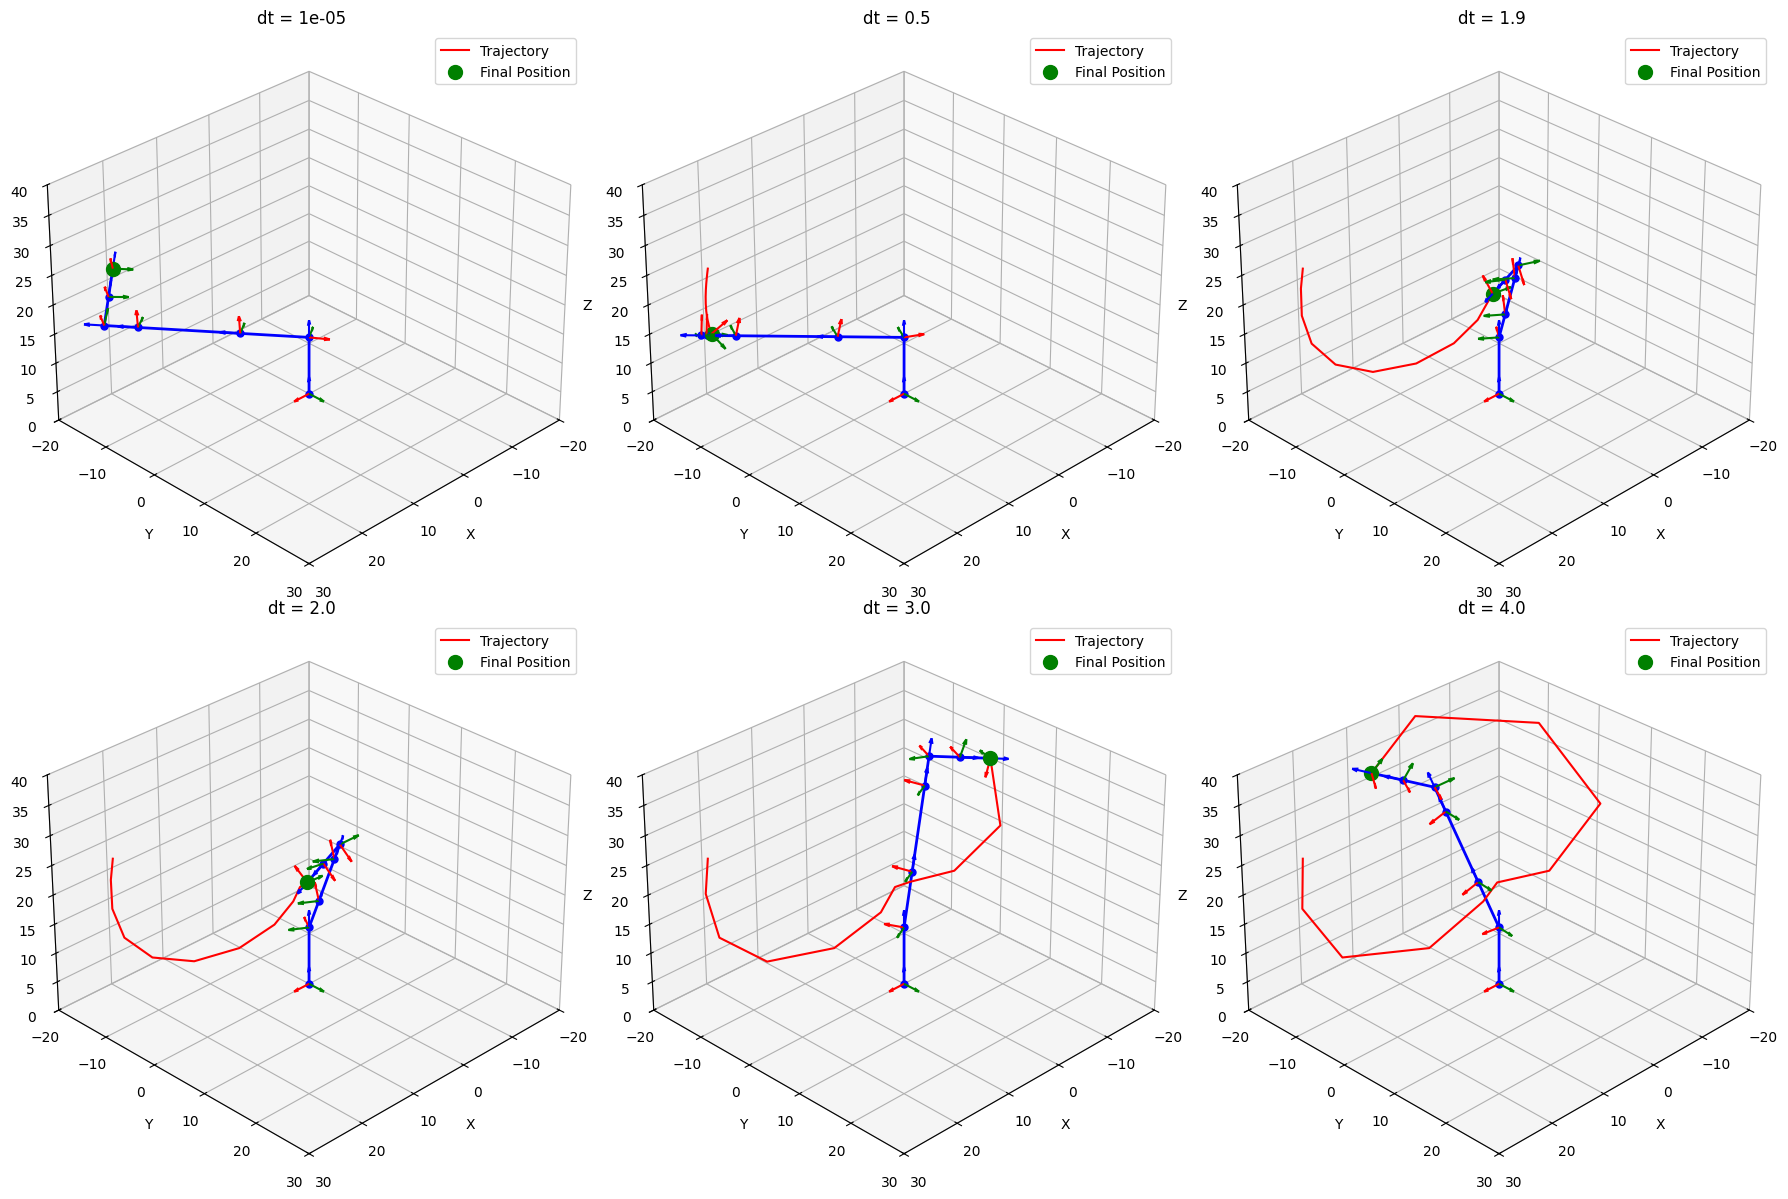

In [4]:
def main():
    import random
    import math
    import numpy as np
    import matplotlib.pyplot as plt

    # for simpliest analysis, cause base position in each iteration equal
    random.seed(0)



    t1_in = math.radians(random.uniform(-180, 180))
    t2_in = math.radians(random.uniform(-180, 180))
    t3_in = 0
    t4_in = math.radians(random.uniform(-180, 180))
    t5_in = math.radians(random.uniform(-180, 180))
    t6_in = math.radians(random.uniform(-180, 180))

    input_angles = [t1_in, t2_in, t3_in, t4_in, t5_in, t6_in]

    q_dot = np.array([0.1, -0.05, 0.0, 0.2, -0.1, 0.15])
    n_steps = 10


    dt_values = [0.00001, 0.5, 1.9, 2.0, 3.0, 4.0]

    fig = plt.figure(figsize=(18, 12))

    for i, dt in enumerate(dt_values, 1):
        robot = RobotArm()
        step = 0
        robot.current_joints = input_angles.copy()

        T06_in = robot.forward_kinematics(robot.current_joints)
        p_old = T06_in[0:3, 3]

        trajectory = [p_old.copy()]

        for step in range(n_steps):
            J = robot.jacobian_numeric()
            x_dot = J @ q_dot
            robot.current_joints = [
                angle + qd * dt for angle, qd in zip(robot.current_joints, q_dot)
            ]


            T06 = robot.forward_kinematics(robot.current_joints)
            p_new = T06[0:3, 3]


            print(f"Step {step+1}:")
            print("  x_dot (linear velocities):", x_dot)
            print("  New position:", p_new)

            trajectory.append(p_new.copy())

        trajectory = np.array(trajectory)


        ax = fig.add_subplot(2, 3, i, projection='3d')
        ax.view_init(elev=30, azim=45)
        robot.plot_robot(robot.current_joints, ax=ax, show_frames=True)

        ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], color='red', label='Trajectory')
        ax.scatter(trajectory[-1, 0], trajectory[-1, 1], trajectory[-1, 2], color='green', s=100, label='Final Position')

        ax.set_title(f"dt = {dt}")
        ax.legend()
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()


### Conclusion

The larger the integration step `dt`, the more numerical errors accumulate during the motion calculation.  
At small `dt`, the integration process is more accurate, resulting in smooth and realistic movements of the robot and the end-effector that closely follow the expected kinematics.  
At large `dt`, integration errors lead to inaccurate computation of new positions, which manifests as a distorted trajectory and erratic movements of the end-effector


### Inverse Jacobian


Step 1:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [-1.48540385 -1.1861452  -4.67870689  0.57261061  2.46499584 -1.20099835]
  New position: [  9.92861665 -30.40555421  13.24613383]
Step 2:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [-1.48307249 -1.18513888 -4.67347322  0.57274284  2.46252128 -1.20120434]
  New position: [  9.92826725 -30.40587934  13.24642937]
Step 3:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [-1.48307249 -1.18513888 -4.67347322  0.57274284  2.46252128 -1.20120434]
  New position: [  9.92791784 -30.40620445  13.24672491]
Step 4:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [-1.4909856  -1.1928877  -4.69963927  0.57967613  2.47775289 -1.21297345]
  New position: [  9.92756651 -30.4065315   13.24702211]
Step 5:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velo

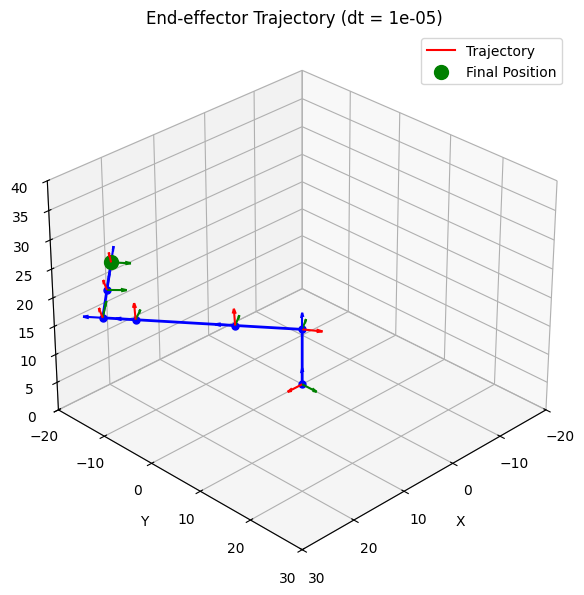

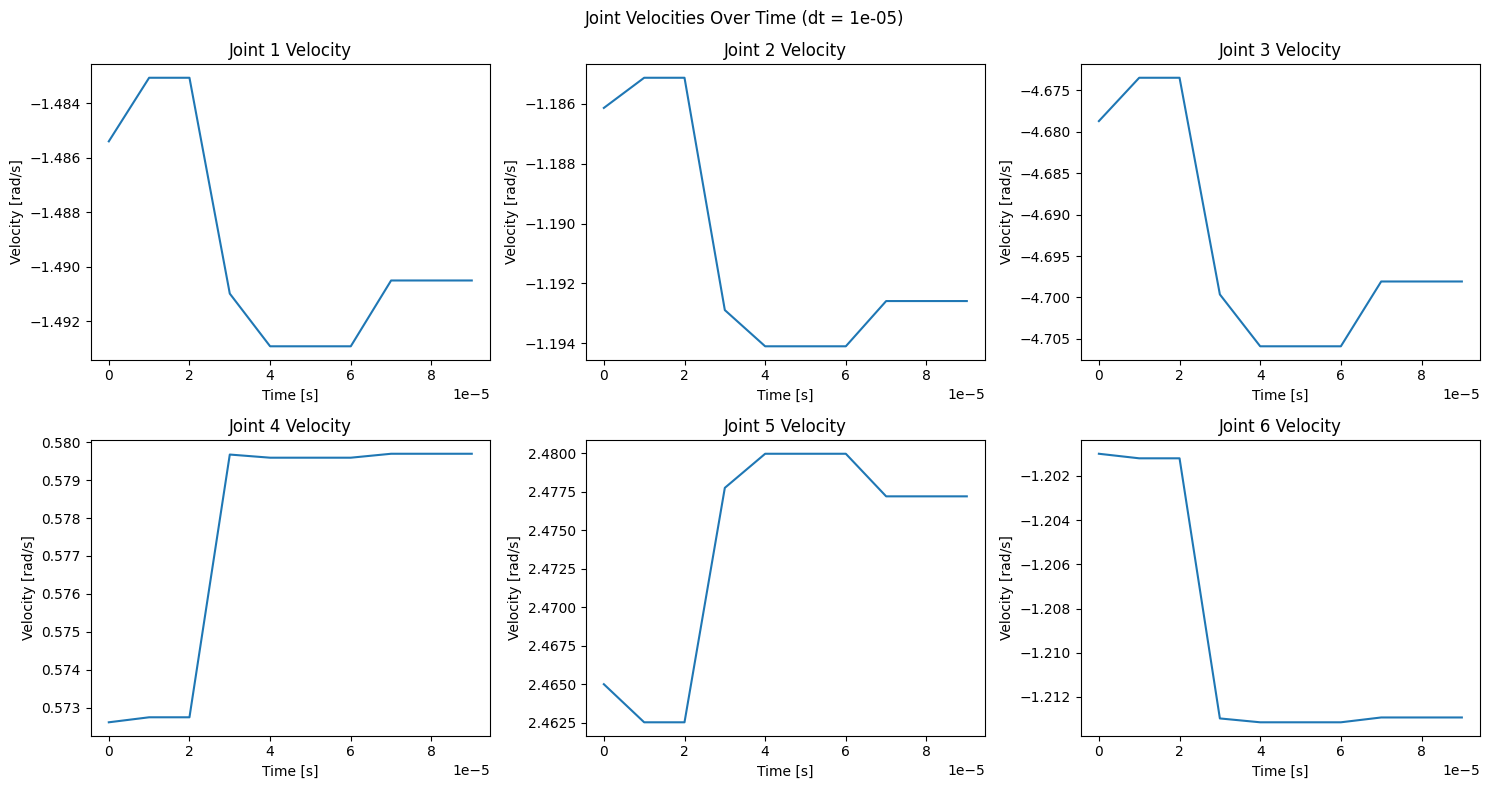

Step 1:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [-1.48540385 -1.1861452  -4.67870689  0.57261061  2.46499584 -1.20099835]
  New position: [  8.12762855 -31.91094886  14.75636092]
Step 2:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [-3.09525846 -1.92624097 -9.08828324  0.74254024  4.28061573 -1.22811674]
  New position: [  4.00657172 -34.04084036  17.42395551]
Step 3:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [ 128.47929512   57.86715192  368.83981841  -11.24781733 -142.8803762
   -5.93115644]
  New position: [-14.56332215  16.30735666  -5.86100746]
Step 4:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [ 0.00137914  0.31710243  0.39821996 -0.66871655  0.7863538  -0.41240332]
  New position: [-14.6531131   16.80843688  -5.92535936]
Step 5:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot

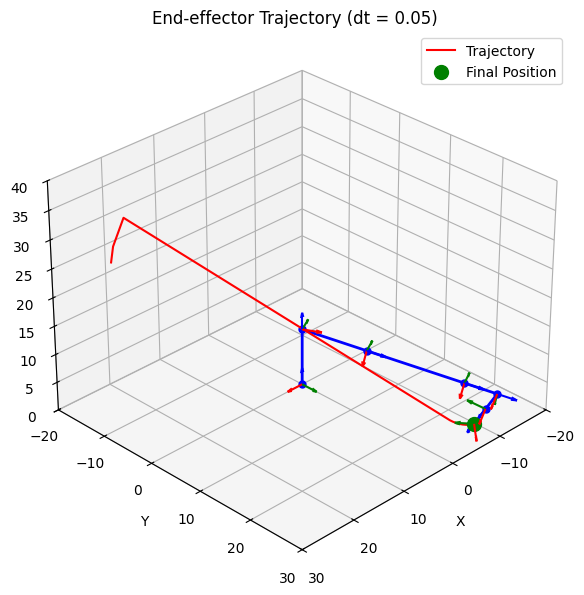

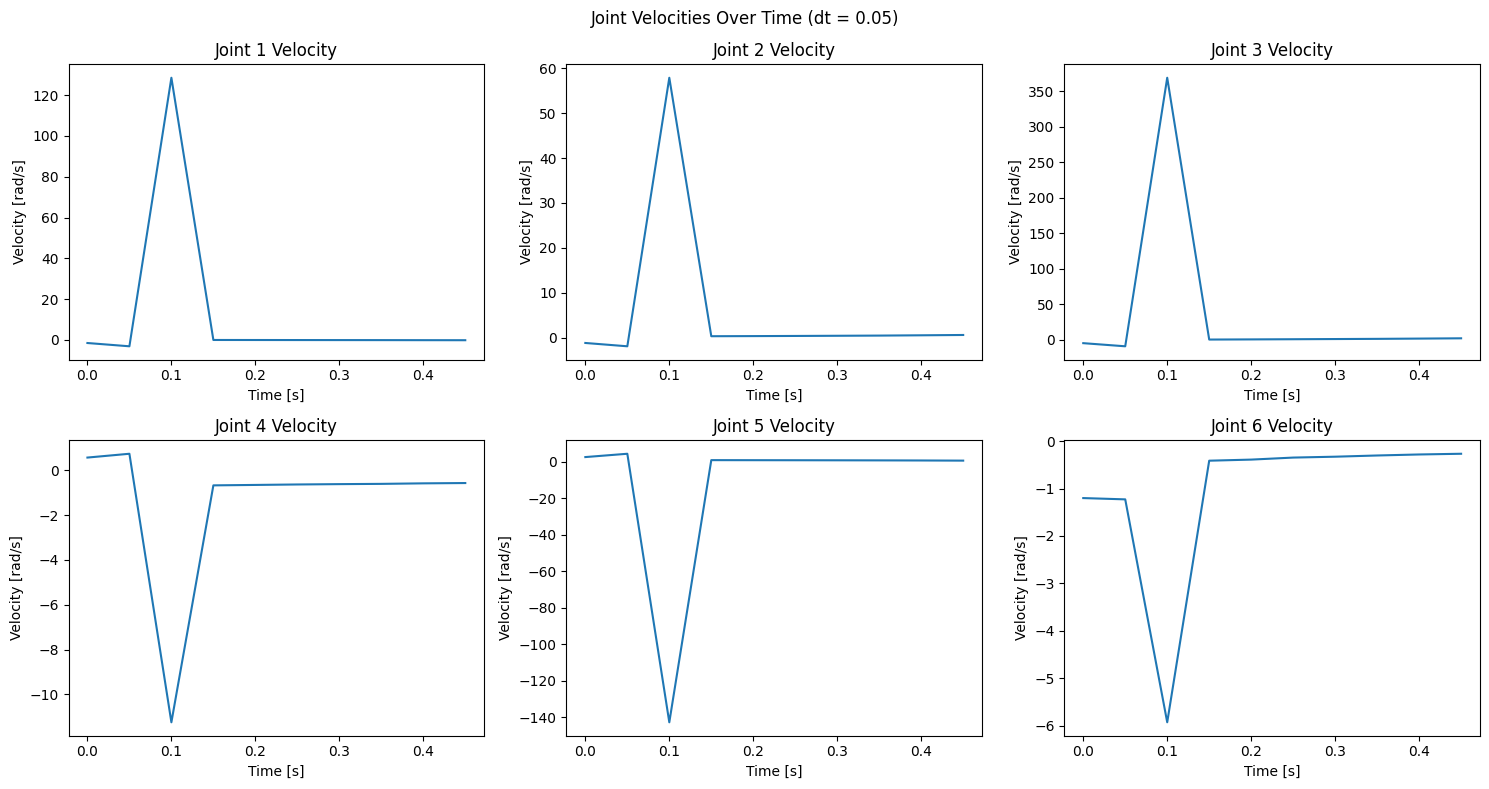

Step 1:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [-1.48540385 -1.1861452  -4.67870689  0.57261061  2.46499584 -1.20099835]
  New position: [ 9.40201158 -6.98475574 26.21838901]
Step 2:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [ 0.01917279  1.13060153 -6.63268047  7.26072459  0.51344814  6.22336677]
  New position: [-21.55087311  12.90663363   3.20650105]
Step 3:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [ -42.70893392 -362.17758676  114.78111825   21.90096351 -364.10613382
   32.62554902]
  New position: [20.1112453   1.18020391  4.44915375]
Step 4:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [ 0.03256097 -0.03177784 -1.2503672   1.09037386 -0.37390217 -0.05818383]
  New position: [19.16306642 -0.66967852  1.5987995 ]
Step 5:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint 

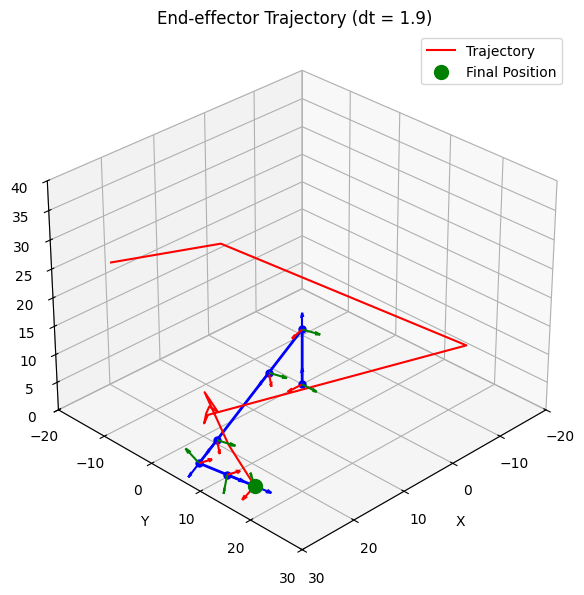

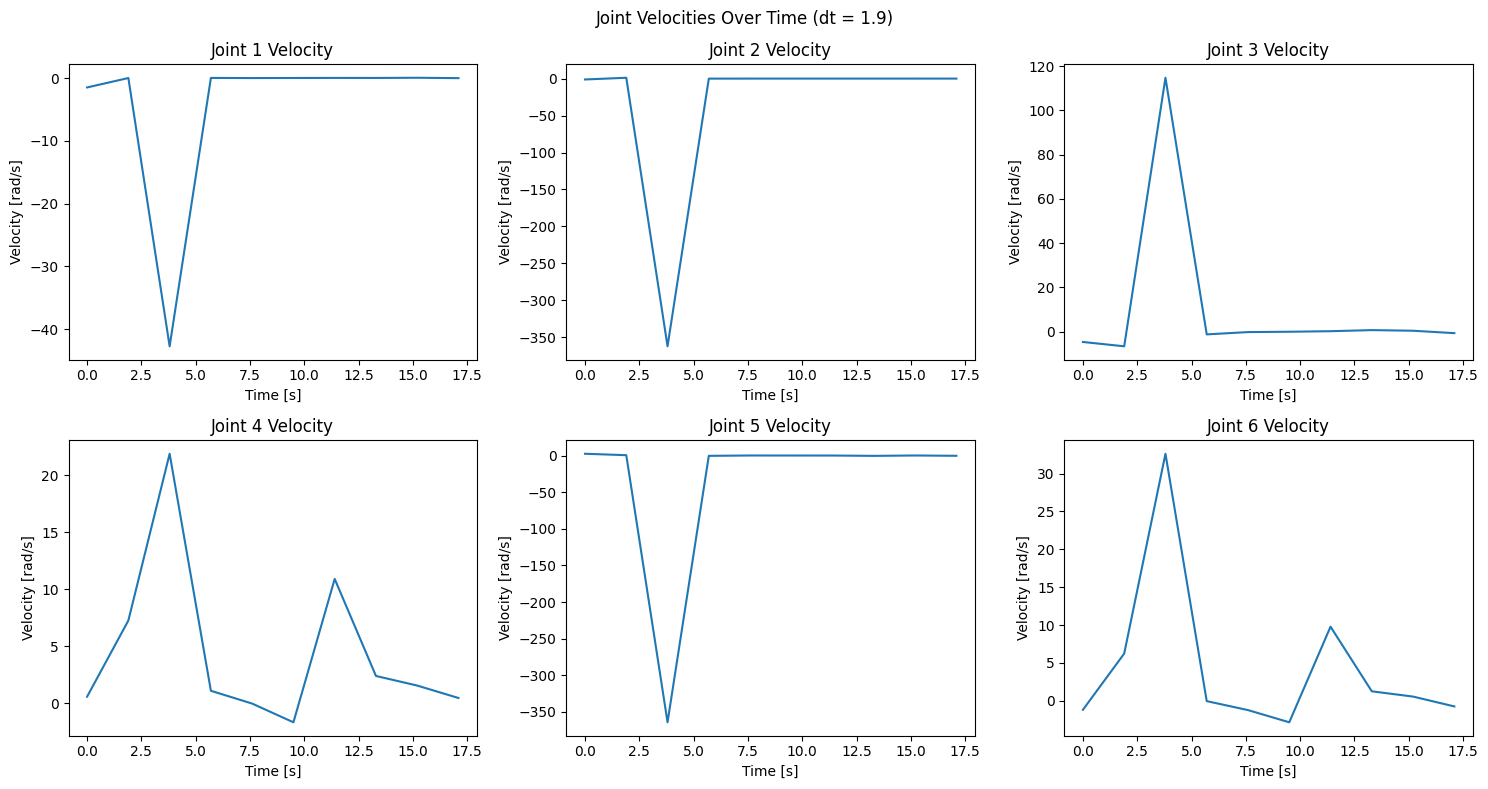

Step 1:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [-1.48540385 -1.1861452  -4.67870689  0.57261061  2.46499584 -1.20099835]
  New position: [10.35824768 -7.69169305 25.99582752]
Step 2:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [ 1.20102766  0.5687611  -5.73702165  0.18523147  1.39450181  0.22862728]
  New position: [-3.08319518e-02 -1.56748100e+01  4.67753982e+01]
Step 3:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [-13.03323692  -4.62316465 -44.73030736  52.73319861   4.50962854
 -40.74233356]
  New position: [12.64297667  4.2621502  -7.05987454]
Step 4:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [-1.17449948 -0.1510053   9.85702318  1.49628071 -1.23790866  2.26939701]
  New position: [  0.47929099  -9.65218189 -28.68814316]
Step 5:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (

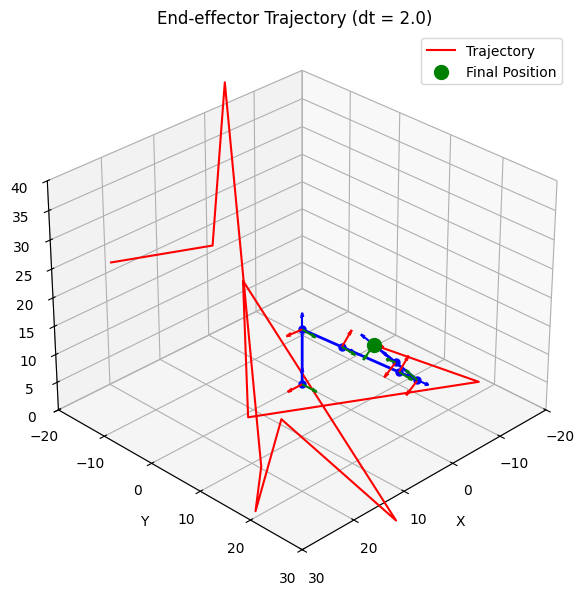

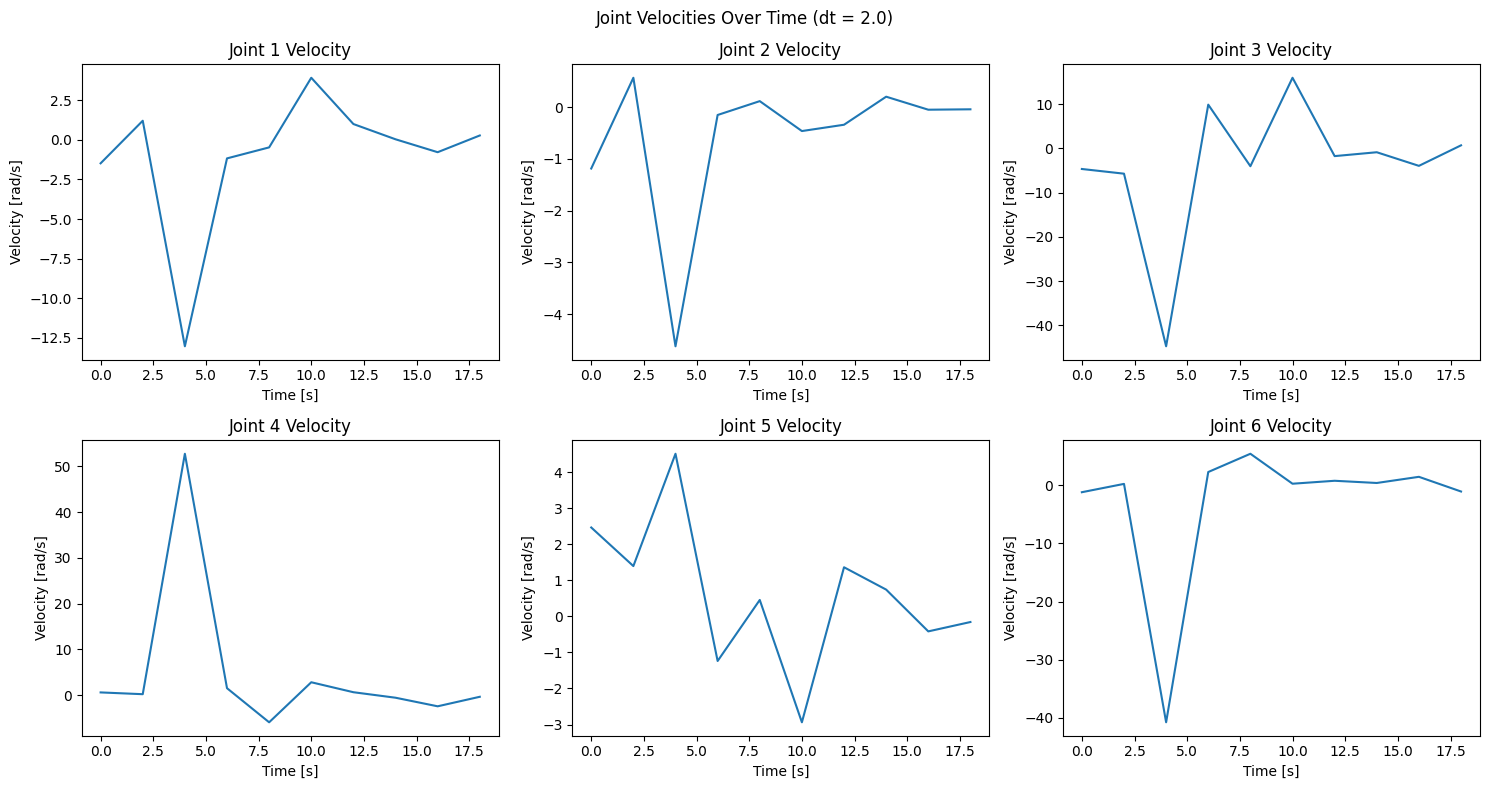

Step 1:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [-1.48540385 -1.1861452  -4.67870689  0.57261061  2.46499584 -1.20099835]
  New position: [-24.02096102 -29.3608607   -0.62421078]
Step 2:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [-0.67219985  0.49285348  1.71346795 -3.46676437  0.90119262  2.5187966 ]
  New position: [-10.08132159   5.18766856  31.71213676]
Step 3:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [-4.50612995  0.2851213   4.72158344  3.45648972  2.66923685 -0.92346642]
  New position: [-10.67222913 -11.93119681  29.05517545]
Step 4:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [ 0.28569312 -0.34147212 -0.58813049 -1.16398329 -0.46804934 -1.03654342]
  New position: [-6.07039993  8.07871916 29.42611203]
Step 5:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocit

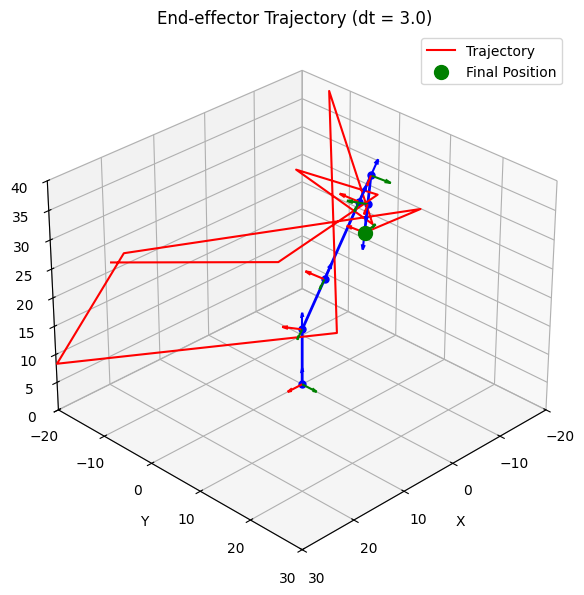

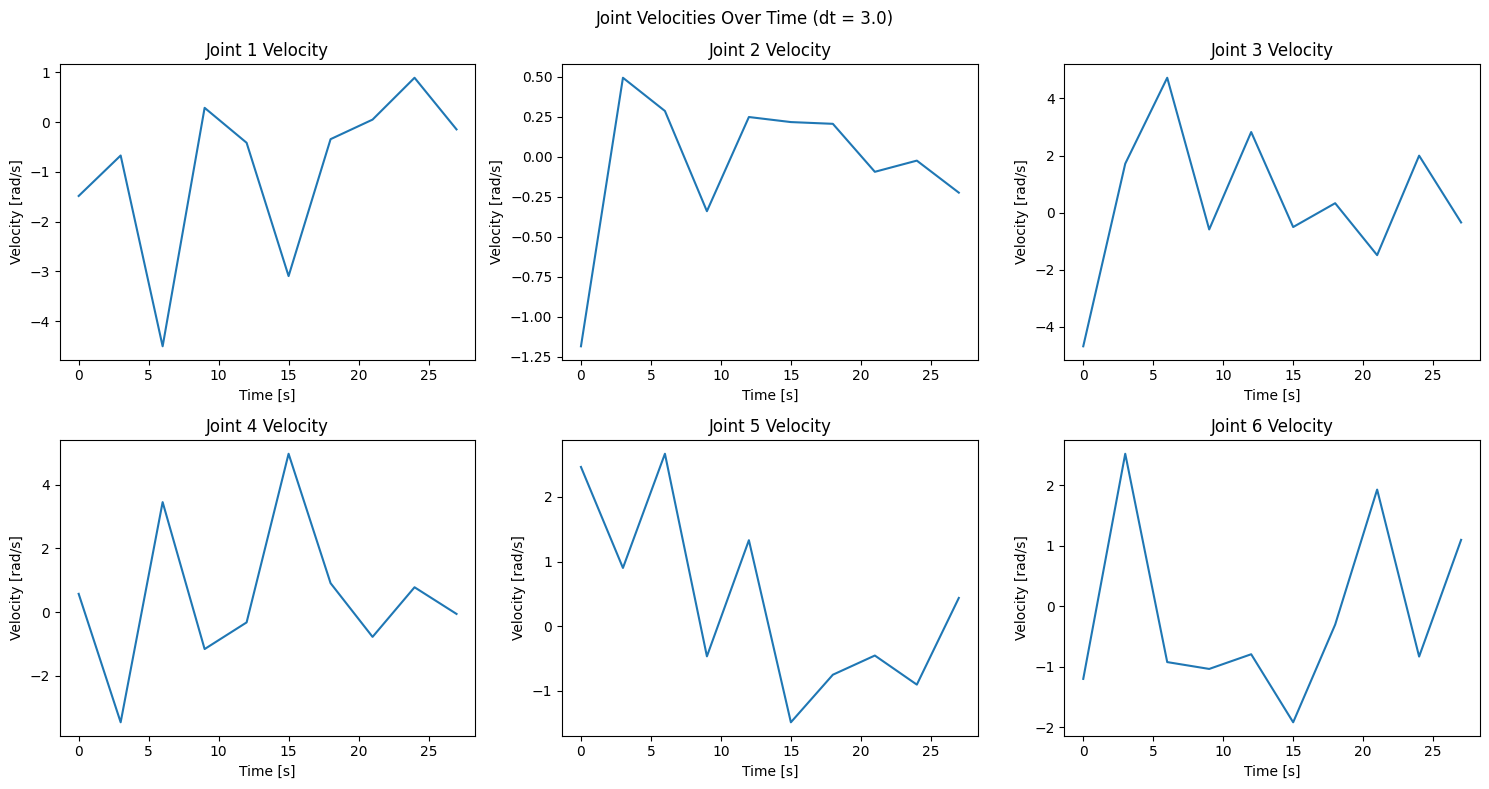

Step 1:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [-1.48540385 -1.1861452  -4.67870689  0.57261061  2.46499584 -1.20099835]
  New position: [  5.41310893  -6.39444928 -15.43191431]
Step 2:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [65.4284583   9.03933522 -6.71278414 65.28756223 -9.7402013  -0.37322342]
  New position: [-33.39242473 -15.66944272   2.43066741]
Step 3:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [ 0.30528075  1.14955686  2.57730734 -0.86368888 -0.83915276 -0.409285  ]
  New position: [ 1.56993467 -3.83767646 31.97009043]
Step 4:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint velocities): [-10.36027684  -1.34028211   4.35731861  11.29589615   0.28672723
   0.98919231]
  New position: [ 6.19023192 25.439556   30.27182274]
Step 5:
  x_dot (linear velocities): [0.1  2.1  1.   1.2  0.1  0.15]
  q_dot (joint vel

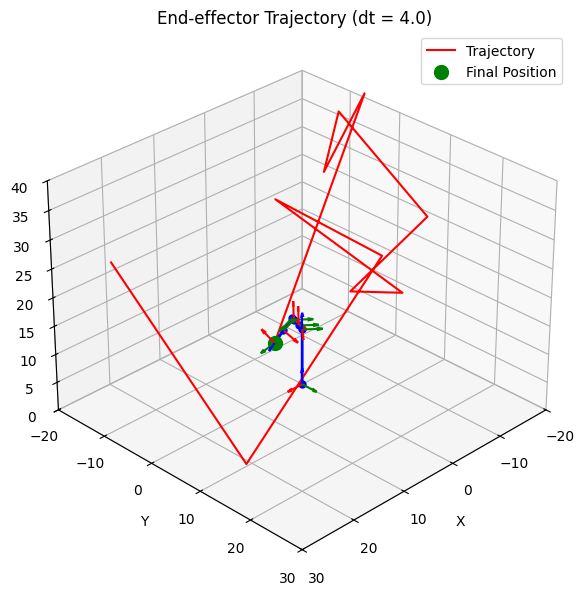

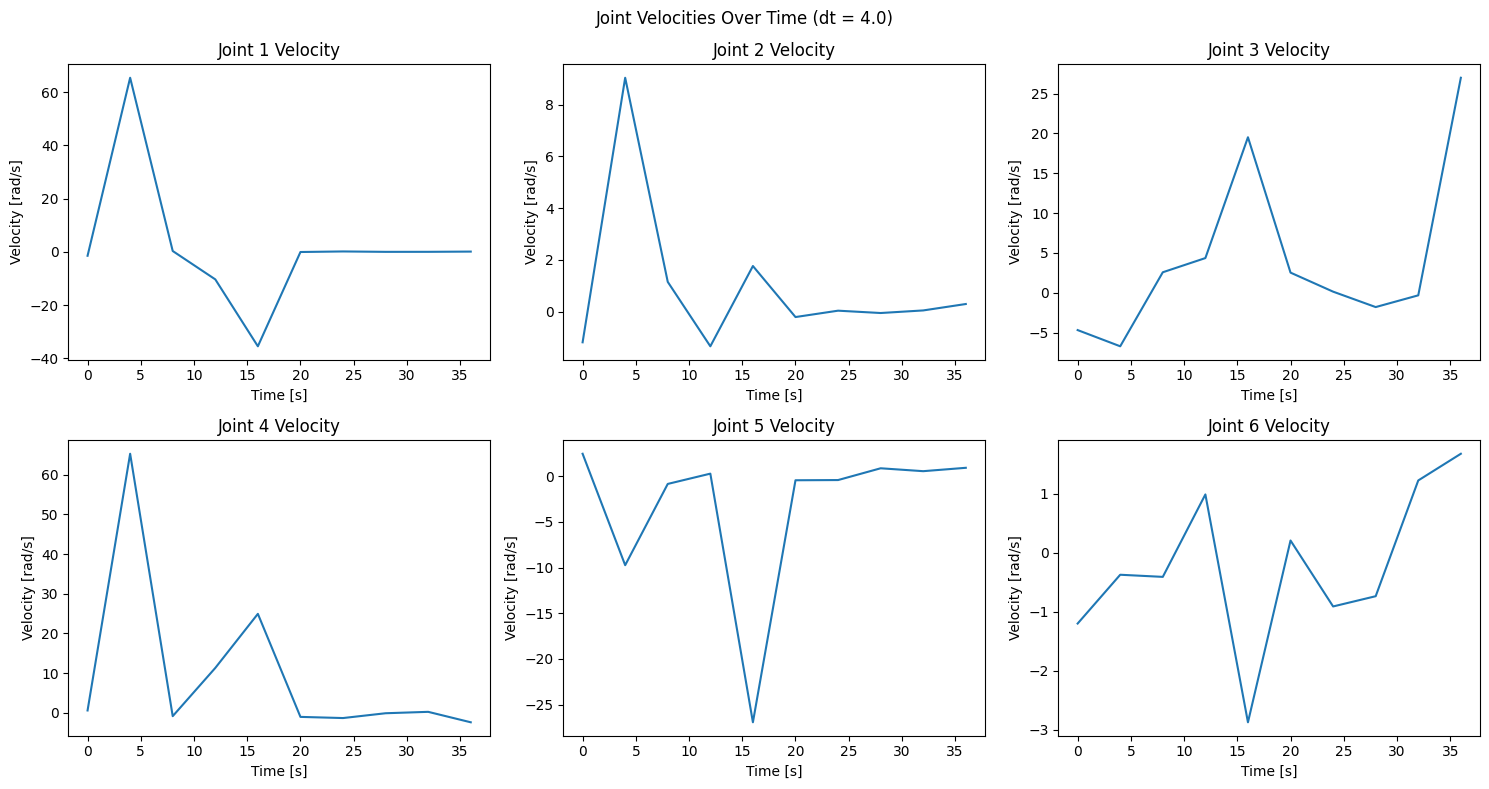

In [5]:
def main():
    import random
    import math
    import numpy as np
    import matplotlib.pyplot as plt

    random.seed(0)


    t1_in = math.radians(random.uniform(-180, 180))
    t2_in = math.radians(random.uniform(-180, 180))
    t3_in = 0
    t4_in = math.radians(random.uniform(-180, 180))
    t5_in = math.radians(random.uniform(-180, 180))
    t6_in = math.radians(random.uniform(-180, 180))

    input_angles = [t1_in, t2_in, t3_in, t4_in, t5_in, t6_in]

    x_dot = np.array([0.1, 2.1, 1.0, 1.2, 0.1, 0.15])
    n_steps = 10

    dt_values = [0.00001, 0.05, 1.9, 2.0, 3.0, 4.0]

    for i, dt in enumerate(dt_values, 1):
        robot = RobotArm()
        robot.current_joints = input_angles.copy()

        T06_in = robot.forward_kinematics(robot.current_joints)
        p_old = T06_in[0:3, 3]

        trajectory = [p_old.copy()]
        joint_trajectory = [robot.current_joints.copy()]
        joint_velocities = []

        for step in range(n_steps):
            J = robot.jacobian_numeric()

            q_dot = np.linalg.pinv(J) @ x_dot

            robot.current_joints = [
                angle + qd * dt for angle, qd in zip(robot.current_joints, q_dot)
            ]
            joint_trajectory.append(robot.current_joints.copy())
            joint_velocities.append(q_dot.copy())

            T06 = robot.forward_kinematics(robot.current_joints)
            p_new = T06[0:3, 3]

            print(f"Step {step+1}:")
            print("  x_dot (linear velocities):", x_dot)
            print("  q_dot (joint velocities):", q_dot)
            print("  New position:", p_new)

            trajectory.append(p_new.copy())

        trajectory = np.array(trajectory)
        joint_trajectory = np.array(joint_trajectory)
        joint_velocities = np.array(joint_velocities)


        fig_traj = plt.figure(figsize=(8, 6))
        ax = fig_traj.add_subplot(111, projection='3d')
        ax.view_init(elev=30, azim=45)
        robot.plot_robot(robot.current_joints, ax=ax, show_frames=True)

        ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], color='red', label='Trajectory')
        ax.scatter(trajectory[-1, 0], trajectory[-1, 1], trajectory[-1, 2], color='green', s=100, label='Final Position')

        ax.set_title(f"End-effector Trajectory (dt = {dt})")
        ax.legend()
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.tight_layout()
        plt.show()


        if len(joint_velocities) > 0:
            fig_vel = plt.figure(figsize=(15, 8))
            ax2 = fig_vel.subplots(2, 3)
            ax2 = ax2.flatten()

            time = np.arange(len(joint_velocities)) * dt

            for j in range(6):
                ax2[j].plot(time, joint_velocities[:, j])
                ax2[j].set_title(f'Joint {j+1} Velocity')
                ax2[j].set_xlabel('Time [s]')
                ax2[j].set_ylabel('Velocity [rad/s]')

            fig_vel.suptitle(f'Joint Velocities Over Time (dt = {dt})')
            plt.tight_layout()
            plt.show()

if __name__ == '__main__':
    main()


### Reflection on the Results:

As observed, the motion of the end-effector is strongly affected by the choice of the integration step size `dt`.

- When `dt` is very small (e.g., 1e-5), the velocities of the joints are smooth and stable, leading to a smooth and accurate trajectory of the end-effector.
- As `dt` increases (e.g., 0.05), small irregularities start to appear in joint velocities, causing slight distortions in the end-effector's motion.
- For larger step sizes (e.g., 1.9, 2.0, 3.0, 4.0), the joint velocities become more erratic and unstable. Sudden jumps and oscillations are observed, leading to chaotic and unrealistic motion of the end-effector.
- Larger time steps cause larger numerical errors during integration, which accumulate over time and result in poor tracking performance and instability.

In conclusion, smaller step sizes lead to more accurate and smoother motion of the end-effector, while larger step sizes introduce significant numerical errors and instability in the system.


### Analysing Singular Configurations of Robot

#### Resolving Singularities and Regaining Full Jacobian Rank

When the robot is at a **singular configuration** (e.g., wrist singularity or arm singularity), the Jacobian matrix loses its full rank and becomes non-invertible. To resolve this singularity and regain full rank, we can analyze the **null space**, **row space**, and **column space** of the Jacobian.

---

#### Analysis of Jacobian Spaces:

#### 1. **Null Space $\mathcal{N}(J)$**:
- Set of joint velocity vectors $\dot{q}_0$ such that:
$$
J \dot{q}_0 = 0
$$
- Movements in the null space **do not** affect the end-effector motion.
- We can add arbitrary motions in $\mathcal{N}(J)$ to "escape" singularities without violating the task.

#### 2. **Column Space $\mathcal{R}(J)$**:
- The set of achievable **end-effector velocities**.
- If the desired motion $\dot{x}_d \notin \mathcal{R}(J)$, it is **impossible** to achieve it.
- Strategy:
  - **Project** $\dot{x}_d$ into $\mathcal{R}(J)$
  - Modify task slightly to make motion feasible.

#### 3. **Row Space $\mathcal{R}(J^T)$**:
- Related to forces/moments that the joints can apply.
- Important for considering force/torque tasks alongside motion.

---

#### Possible Solutions to Resolve the Singularity:

#### 1. **Use the Pseudo-Inverse Solution**
- Instead of the standard inverse, use the pseudo-inverse:
$$
\dot{q} = J^\dagger \dot{x}_d
$$
- Even when $J$ is singular, $J^\dagger$ provides the **minimum-norm solution**.

#### 2. **Damped Least Squares (DLS) Method**
- Modify the inversion to be stable near singularities:
$$
J^* = J^T (J J^T + k^2 I)^{-1}
$$
- $k$ is a small damping factor.
- Prevents large joint velocities near singularities.

#### 3. **Exploit Null Space Movements**
- General solution:
$$
\dot{q} = J^\dagger \dot{x}_d + (I - J^\dagger J) \dot{q}_0
$$
- $\dot{q}_0$ can be chosen to:
  - Maximize manipulability.
  - Stay away from joint limits.
  - Avoid obstacles.
- **Regains rank** by moving out of singular configurations.

#### 4. **Modify the Desired End-Effector Motion**
- If $\dot{x}_d \notin \mathcal{R}(J)$, **project** desired motion onto reachable space:
$$
\dot{x}_d^{\text{proj}} = \text{projection of } \dot{x}_d \text{ onto } \mathcal{R}(J)
$$
- Trade-off between tracking accuracy and feasibility.

---

### Final Summary:
- **Null space** helps adjust internal motions without affecting task.
- **Column space** shows feasible end-effector velocities.
- **Row space** relates to achievable forces.
- Main methods:
  - **Pseudo-inverse** solution.
  - **Damped least squares**.
  - **Null-space optimization**.
  - **Task modification**.

These techniques allow to **regain full matrix rank** and maintain operational control even under singular conditions.
